In [ ]:
import numpy
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2 as cv2
from sklearn.datasets import load_files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from glob import glob
data = glob('/content/drive/My Drive/dataset/*.jpg')
print("Length of Dataset: {}".format(len(data)))

Length of Dataset: 3700


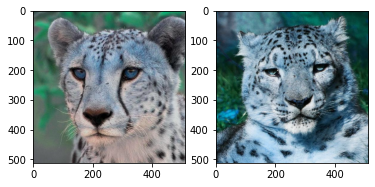

In [ ]:
plt.subplot(121)
plt.imshow(cv2.imread(data[0]))
plt.subplot(122)
plt.imshow(cv2.imread(data[302]))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data, test_size = 0.25, random_state=0)

In [ ]:
print('Train Data Size: {} and Test Data Size: {}'.format(len(X_train), len(X_test)))

Train Data Size: 2775 and Test Data Size: 925


In [ ]:
train_data = []
for image in X_train:
    processed_data = cv2.imread(image)
    train_data.append(processed_data)
print('Length of Processed Data: {}'.format(len(train_data)))

Length of Processed Data: 2775


In [ ]:
test_data = []
for image in X_test:
    processed_data = cv2.imread(image)
    test_data.append(processed_data)
print('Length of Test Processed Data: {}'.format(len(test_data)))

Length of Test Processed Data: 925


In [ ]:
print('Shape of sample Train Data: {}'.format(train_data[0].shape))
print('Shape of sample Test Data: {}'.format(test_data[0].shape))

Shape of sample Train Data: (512, 512, 3)
Shape of sample Test Data: (512, 512, 3)


In [ ]:
train_data = numpy.asarray(train_data)
test_data = numpy.asarray(test_data)
print("train data shape: ",train_data.shape)
print("test data shape: ",test_data.shape)

train data shape:  (2775, 512, 512, 3)
test data shape:  (925, 512, 512, 3)


In [ ]:
from tensorflow.keras import models, layers

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(512, 512, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(2,(3, 3), activation='relu',padding='same'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(16,(3, 3), activation='relu',padding='same'))
model.add(layers.UpSampling2D((2, 2)))
 
model.add(layers.Conv2D(3,(3, 3), activation='sigmoid',padding='same'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 512, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 2)       1

In [ ]:
model.compile(optimizer='Adadelta', loss='binary_crossentropy')

In [ ]:
Model = model.fit(train_data, train_data, epochs=3, batch_size=32, validation_data=(test_data, test_data), verbose=1)

Epoch 1/3
19/87 [=====>........................] - ETA: 22:33 - loss: 137.5541